In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Remove espaços extras e converte para datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['date_added'] = pd.to_datetime(df['date_added'])
df['listed_in'] = df['listed_in'].str.split(', ')
df['cast'] = df['cast'].fillna('').str.split(', ')
df['director'] = df['director'].fillna('')

Text(0.5, 1.0, 'Distribuição de Filmes vs Séries')

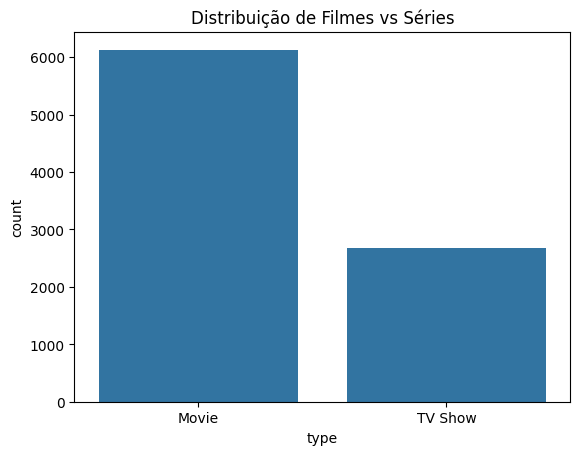

In [7]:
#Distribuição de conteúdo por tipo (Filme vs Série)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title('Distribuição de Filmes vs Séries')

<Axes: title={'center': 'Top 10 Países com Mais Títulos'}, ylabel='country'>

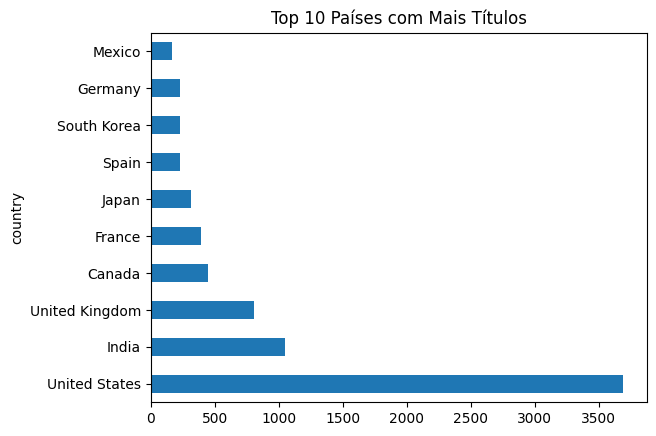

In [10]:
#Top 10 países com mais títulos
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Países com Mais Títulos')

In [14]:
#Títulos adicionados recentemente
recent_titles = df.sort_values(by='date_added', ascending=False).head(10)
recent_titles[['title', 'date_added', 'type']]

,title,date_added,type
0,Dick Johnson Is Dead,2021-09-25,Movie
6,My Little Pony: A New Generation,2021-09-24,Movie
10,"Vendetta: Truth, Lies and The Mafia",2021-09-24,TV Show
9,The Starling,2021-09-24,Movie
8,The Great British Baking Show,2021-09-24,TV Show
7,Sankofa,2021-09-24,Movie
1,Blood & Water,2021-09-24,TV Show
5,Midnight Mass,2021-09-24,TV Show
3,Jailbirds New Orleans,2021-09-24,TV Show
2,Ganglands,2021-09-24,TV Show


<Axes: title={'center': 'Gêneros Mais Populares'}, ylabel='listed_in'>

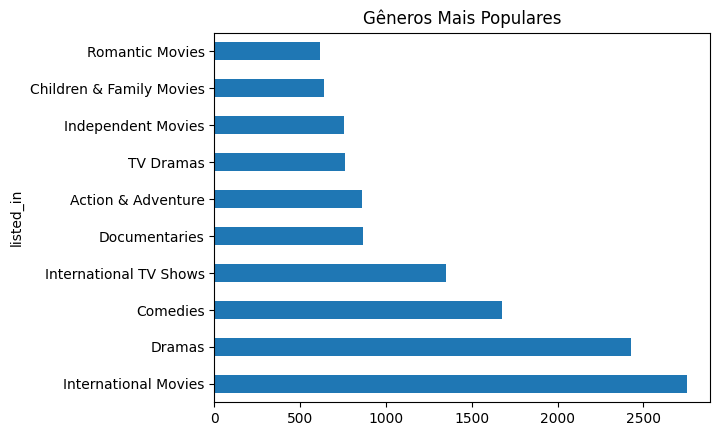

In [15]:
#Gêneros mais populares
popular_genres = df['listed_in'].explode().value_counts().head(10)
popular_genres.plot(kind='barh', title='Gêneros Mais Populares')

In [24]:
#Duração média dos filmes
df_movies = df[df['type'] == 'Movie'].copy()  # <- Adiciona .copy() para evitar o warning
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)
media_duracao = df_movies['duration_minutes'].mean()
print(f'Duração média dos filmes: {media_duracao:.2f} minutos')

Duração média dos filmes: 99.58 minutos


<Axes: title={'center': 'Diretores Mais Frequentes'}, ylabel='director'>

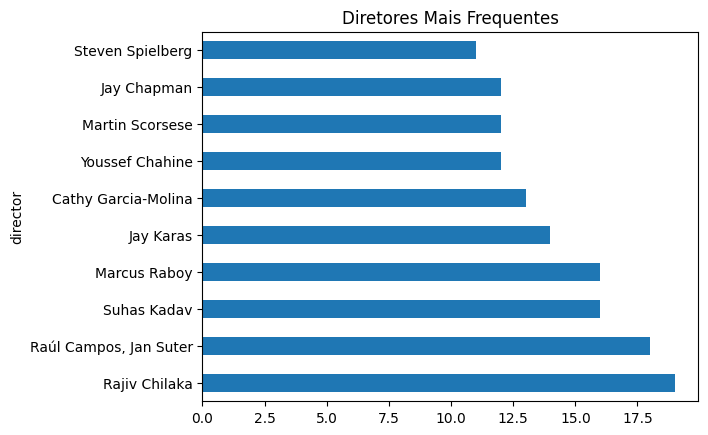

In [26]:
#Diretores mais frequentes
top_directors = df[df['director'] != ''].value_counts('director').head(10)
top_directors.plot(kind='barh', title='Diretores Mais Frequentes')

<Axes: title={'center': 'Atores Mais Frequentes'}, ylabel='cast'>

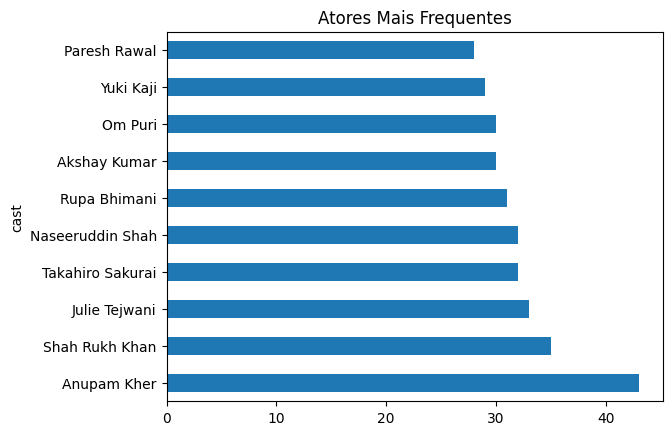

In [29]:
#Atores mais frequentes
actors = df[df['cast'].apply(lambda x: x != [''])].explode('cast').value_counts('cast').head(10)
actors.plot(kind='barh', title='Atores Mais Frequentes')